In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
df=pd.read_csv('zomato_1.csv')
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Buffet,Banashankari


In [3]:
# Define a mapping of listed types to type of restaurant
type_to_type_of_rest = {
    'Buffet': 'Casual Dining',
    'Cafes': 'Casual Dining',
    'Dine-out': 'Casual Dining',
    'Delivery': 'Quick Service',
    'Desserts': 'Quick Service',
    'Drinks & nightlife': 'Night Life',
    'Pubs and bars': 'Night Life'
}

# Map the 'listed_in(type)' values to 'type_of_rest'
df['type_of_rest'] = df['listed_in(type)'].map(type_to_type_of_rest)

In [4]:
# Lists of locations
north_bengaluru = ['Rajajinagar', 'New BEL Road', 'Malleshwaram', 'Kammanahalli', 'Kalyan Nagar', 'Indiranagar']
south_bengaluru = ['Banashankari', 'Bannerghatta Road', 'Basavanagudi', 'Bellandur', 'Whitefield', 'Sarjapur Road', 'BTM', 'Electronic City', 'Marathahalli', 'Koramangala 4th Block', 'Koramangala 5th Block', 'Koramangala 6th Block', 'Koramangala 7th Block', 'JP Nagar', 'Jayanagar', 'HSR', 'Brookefield']
central_bengaluru = ['Brigade Road', 'Residency Road', 'Church Street', 'Old Airport Road', 'MG Road', 'Lavelle Road', 'Frazer Town']

# Function to categorize locations
def categorize_location(row):
    if row['listed_in(city)'] in north_bengaluru:
        return 'north_bengaluru'
    elif row['listed_in(city)'] in south_bengaluru:
        return 'south_bengaluru'
    elif row['listed_in(city)'] in central_bengaluru:
        return 'central_bengaluru'
    else:
        return 'other'  # Add this line if you want to handle other cases

# Apply the function to create a new column
df['location_type'] = df.apply(categorize_location, axis=1)

In [5]:
# Define the columns to drop
columns_to_drop = ['name', 'listed_in(type)', 'listed_in(city)', 'cuisines','location','rest_type']

# Drop the specified columns in-place
df.drop(columns=columns_to_drop, axis=1, inplace=True)

In [6]:
# Define the columns to change to 'category' data type
columns_to_change = ['online_order', 'book_table', 'location_type', 'type_of_rest']

# Convert the specified columns to 'category' data type
df[columns_to_change] = df[columns_to_change].astype('category')

In [7]:
df.drop(df[df['votes'] > 500].index, inplace=True)

In [8]:
Q1 = df['votes'].quantile(0.25)
Q3 = df['votes'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cap outliers in 'votes' column
df['votes'] = df['votes'].apply(lambda x: upper_bound if x > upper_bound else x)
df['votes'] = df['votes'].apply(lambda x: lower_bound if x < lower_bound else x)

In [9]:
Q1 = df['rate'].quantile(0.25)
Q3 = df['rate'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cap outliers in 'votes' column
df['rate'] = df['rate'].apply(lambda x: upper_bound if x > upper_bound else x)
df['rate'] = df['rate'].apply(lambda x: lower_bound if x < lower_bound else x)

In [10]:
df.drop(df[df['approx_cost(for two people)']>850].index, inplace=True)

<AxesSubplot:xlabel='approx_cost(for two people)'>

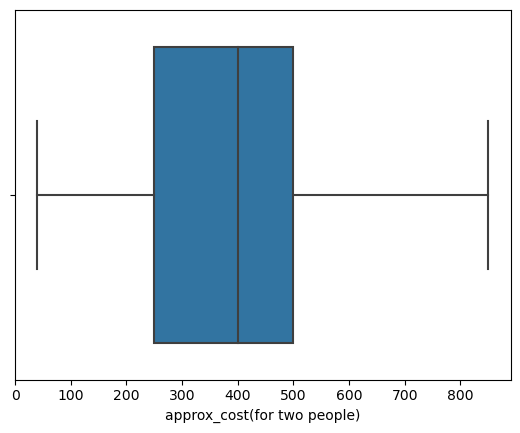

In [11]:
sns.boxplot(df['approx_cost(for two people)'])

In [12]:
df_numeric_features = df.select_dtypes(include=np.number)
df_numeric_features.columns

Index(['rate', 'votes', 'approx_cost(for two people)'], dtype='object')

In [13]:
df_categoric_features = df.select_dtypes(include='category')
df_categoric_features.columns

Index(['online_order', 'book_table', 'type_of_rest', 'location_type'], dtype='object')

In [14]:
for col in df_categoric_features.columns.values:
    dummy_encoded_variables = pd.get_dummies(df_categoric_features[col], prefix=col, drop_first=True)
    df_categoric_features = pd.concat([df_categoric_features, dummy_encoded_variables],axis=1)
    df_categoric_features.drop([col], axis=1, inplace=True)

In [15]:
df1=df.copy()

In [16]:
df1.iloc[:,2:5] = df1.iloc[:, 2:5].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

df1.head()

,online_order,book_table,rate,votes,approx_cost(for two people),type_of_rest,location_type
3,No,No,0.5625,0.345098,0.320988,Casual Dining,south_bengaluru
4,No,No,0.6250,0.650980,0.691358,Casual Dining,south_bengaluru
5,Yes,No,0.6250,1.000000,0.691358,Casual Dining,south_bengaluru
6,No,No,0.5000,0.031373,0.938272,Casual Dining,south_bengaluru
8,Yes,No,0.7500,1.000000,0.814815,Casual Dining,south_bengaluru


In [17]:
numerical_columns = df1.select_dtypes(include=['float64'])
numerical_df = df1[numerical_columns.columns]

In [18]:
df_scaled= pd.concat([numerical_df, df_categoric_features], axis=1)

In [19]:
df_scaled

,rate,votes,approx_cost(for two people),online_order_Yes,book_table_Yes,type_of_rest_Night Life,type_of_rest_Quick Service,location_type_north_bengaluru,location_type_south_bengaluru
3,0.562500,0.345098,0.320988,False,False,False,False,False,True
4,0.625000,0.650980,0.691358,False,False,False,False,False,True
5,0.625000,1.000000,0.691358,True,False,False,False,False,True
6,0.500000,0.031373,0.938272,False,False,False,False,False,True
8,0.750000,1.000000,0.814815,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...
50999,0.562500,0.133333,0.938272,False,False,True,False,False,True
51002,0.000000,0.317647,0.938272,False,False,True,False,False,True
51034,0.562500,0.133333,0.938272,False,False,True,False,False,True
51036,0.000000,0.317647,0.938272,False,False,True,False,False,True


In [20]:
# 'Scikit-learn' (sklearn) emphasizes various regression, classification and clustering algorithms
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

# import function for ridge regression
from sklearn.linear_model import Ridge

# import function for lasso regression
from sklearn.linear_model import Lasso

# import function for elastic net regression
from sklearn.linear_model import ElasticNet

# 'Statsmodels' is used to build and analyze various statistical models
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.tools.eval_measures import rmse
from statsmodels.compat import lzip
from statsmodels.graphics.gofplots import ProbPlot

# 'SciPy' is used to perform scientific computations
from scipy.stats import f_oneway
from scipy.stats import jarque_bera
from scipy import stats

In [42]:
# create a copy of the entire dataset to add the interaction effect using copy()
df_interaction = df_scaled.copy()

# add the interaction variable
df_interaction['votes_book_table'] = df_interaction['votes']*df_interaction['book_table_Yes'] 

# print the data with interaction
df_interaction.head()

,rate,votes,approx_cost(for two people),online_order_Yes,book_table_Yes,type_of_rest_Night Life,type_of_rest_Quick Service,location_type_north_bengaluru,location_type_south_bengaluru,votes_book_table
3,0.5625,0.345098,0.320988,False,False,False,False,False,True,0.0
4,0.6250,0.650980,0.691358,False,False,False,False,False,True,0.0
5,0.6250,1.000000,0.691358,True,False,False,False,False,True,0.0
6,0.5000,0.031373,0.938272,False,False,False,False,False,True,0.0
8,0.7500,1.000000,0.814815,True,False,False,False,False,True,0.0


In [41]:
X = df_interaction.drop(['approx_cost(for two people)'], axis=1)

# extract the target variable from the train set
y = df_interaction['approx_cost(for two people)']

# split data into train subset and test subset for predictor and target variables
# random_state: the seed used by the random number generator
X_train_interaction, X_test_interaction, y_train, y_test = train_test_split( X, y, random_state=1)

# check the dimensions of the train & test subset for 

# print dimension of predictors train set
print("The shape of X_train_interaction is:",X_train_interaction.shape)

# print dimension of predictors test set
print("The shape of X_test_interaction is:",X_test_interaction.shape)

# print dimension of target train set
print("The shape of y_train is:",y_train.shape)

# print dimension of target test set
print("The shape of y_test is:",y_test.shape)

The shape of X_train_interaction is: (30304, 9)
The shape of X_test_interaction is: (10102, 9)
The shape of y_train is: (30304,)
The shape of y_test is: (10102,)


In [25]:
# functions for forward selection
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.feature_selection import RFE

# functions for linear regression
from sklearn.linear_model import LinearRegression

# functions for  cross validation
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn import preprocessing

In [26]:
from sklearn.metrics import accuracy_score as acc
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

In [27]:
X_scaled=df_scaled.drop(['approx_cost(for two people)'], axis=1)
y = df_scaled['approx_cost(for two people)']

In [28]:
X_train_scaled,X_test_scaled,y_train_scaled,y_test_scaled = train_test_split(X_scaled,y,random_state=1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.3s finished

[2024-02-04 13:52:36] Features: 1/7 -- score: 0.12450316568535065[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.5s finished

[2024-02-04 13:52:36] Features: 2/7 -- score: 0.15790825557036114[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.6s finished

[2024-02-04 13:52:37] Features: 3/7 -- score: 0.16474436770345338[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

<Figure size 5000x5000 with 0 Axes>

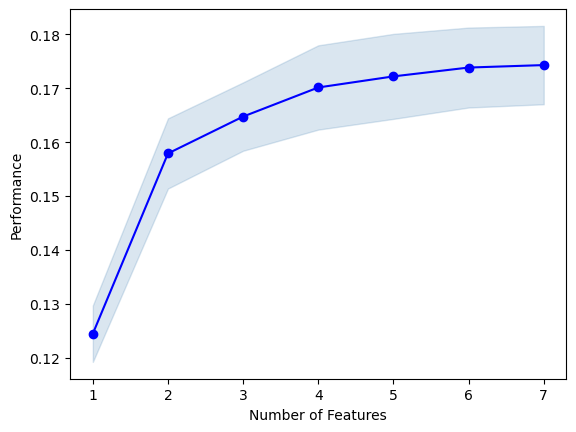

[('rate',
  'votes',
  'online_order_Yes',
  'book_table_Yes',
  'type_of_rest_Night Life',
  'type_of_rest_Quick Service',
  'votes_book_table')]

In [29]:
reg = LinearRegression()

# Build step forward feature selection
sfs1 = sfs(reg, k_features = 7, forward=True,
           floating=False, scoring='r2',
           verbose=2,
           cv=5)

# Perform SFFS
sfs1 = sfs1.fit(X_train_interaction, y_train)

from mlxtend.plotting import plot_sequential_feature_selection as plt_sfs
plt.figure(figsize=(50,50))
fig1 = plt_sfs(sfs1.get_metric_dict(), kind= 'std_dev') 
plt.show()

result = pd.DataFrame(sfs1.get_metric_dict()).T
result = result[['feature_idx','avg_score','feature_names']]
imp_vars_forward = list(result.feature_names[result['avg_score'] == max(result.avg_score)])
imp_vars_forward

In [30]:
df_scaled.dtypes

rate                             float64
votes                            float64
approx_cost(for two people)      float64
online_order_Yes                    bool
book_table_Yes                      bool
type_of_rest_Night Life             bool
type_of_rest_Quick Service          bool
location_type_north_bengaluru       bool
location_type_south_bengaluru       bool
dtype: object

In [31]:
from sklearn.linear_model import Ridge
# Define the features and target variable
X = df_scaled.drop(columns=['approx_cost(for two people)','location_type_north_bengaluru','location_type_south_bengaluru'])

y = df_scaled['approx_cost(for two people)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Ridge model
ridge_model = Ridge(alpha=0.001)  # You can adjust the alpha parameter

# Fit the model on the training data
ridge_model.fit(X_train, y_train)

# Predict the target variable on the testing data
y_pred = ridge_model.predict(X_test)

# Calculate Mean Squared Error (MSE) as a performance metric
mse = mean_squared_error(y_test, y_pred)

# Print the Mean Squared Error
print("Mean Squared Error:", mse)

Mean Squared Error: 0.04015427492789717


In [32]:
# Calculate R-squared value
r2 = r2_score(y_test, y_pred)

# Print the R-squared value
print("R-squared value:", r2)

R-squared value: 0.1726846856873644


In [33]:
df_interaction

,rate,votes,approx_cost(for two people),online_order_Yes,book_table_Yes,type_of_rest_Night Life,type_of_rest_Quick Service,location_type_north_bengaluru,location_type_south_bengaluru,votes_book_table
3,0.562500,0.345098,0.320988,False,False,False,False,False,True,0.0
4,0.625000,0.650980,0.691358,False,False,False,False,False,True,0.0
5,0.625000,1.000000,0.691358,True,False,False,False,False,True,0.0
6,0.500000,0.031373,0.938272,False,False,False,False,False,True,0.0
8,0.750000,1.000000,0.814815,True,False,False,False,False,True,0.0
...,...,...,...,...,...,...,...,...,...,...
50999,0.562500,0.133333,0.938272,False,False,True,False,False,True,0.0
51002,0.000000,0.317647,0.938272,False,False,True,False,False,True,0.0
51034,0.562500,0.133333,0.938272,False,False,True,False,False,True,0.0
51036,0.000000,0.317647,0.938272,False,False,True,False,False,True,0.0


In [34]:
X = df_interaction.drop(['approx_cost(for two people)','location_type_north_bengaluru','location_type_south_bengaluru','votes_book_table'], axis=1)

# extract the target variable from the train set
y = df_interaction['approx_cost(for two people)']

# split data into train subset and test subset for predictor and target variables
# random_state: the seed used by the random number generator
X_train_interaction, X_test_interaction, y_train, y_test = train_test_split( X, y, random_state=1)

# check the dimensions of the train & test subset for 

# print dimension of predictors train set
print("The shape of X_train_interaction is:",X_train_interaction.shape)

# print dimension of predictors test set
print("The shape of X_test_interaction is:",X_test_interaction.shape)

# print dimension of target train set
print("The shape of y_train is:",y_train.shape)

# print dimension of target test set
print("The shape of y_test is:",y_test.shape)

The shape of X_train_interaction is: (30304, 6)
The shape of X_test_interaction is: (10102, 6)
The shape of y_train is: (30304,)
The shape of y_test is: (10102,)


In [69]:
import numpy as np
from sklearn.linear_model import Ridge

# Create a Ridge Regression model with a specified alpha (regularization strength)
model = Ridge(alpha=1.0)

# Fit the model to the data
model.fit(X_train_interaction, y_train)

# Reshape the y_train array to match the expected format
y_train_reshaped = np.array(y_train).reshape(-1, 1)

# Make predictions
y_pred = model.predict(X_train_interaction)  # Note: Use X_train_interaction for prediction, not y_train_reshaped

In [49]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

# Assuming you have your data in X and y
ridge_model = Ridge(alpha=1.0)

# Fit the model to the data
ridge_model.fit(X_train_interaction, y_train)

# Make predictions
y_pred = ridge_model.predict(X_train_interaction)

# Calculate R-squared
r2 = r2_score(y_train, y_pred)
print("R-squared:", r2)

R-squared: 0.17530867087274615


In [50]:
coef = ridge_model.coef_
intercept = ridge_model.intercept_
print("Coefficients:", coef)
print("Intercept:", intercept)

Coefficients: [  0.         -40.86713489   0.73330284  15.88722872 268.63873784
 253.61500874 -20.0528723  -10.25560964  -7.14912005  -0.27952774]
Intercept: 499.02672869971343


In [49]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Transform features into polynomial features
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_train)

# Create a Linear Regression model for polynomial features
model = LinearRegression()

# Fit the model to the polynomial features
model.fit(X_poly, y_train)

# Transform test features and make predictions
X_test_poly = poly.transform(X_test)
y_pred = model.predict(X_test_poly)

In [50]:
from sklearn.tree import DecisionTreeRegressor

# Create a Decision Tree Regression model
model = DecisionTreeRegressor()

# Fit the model to the data
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regression model
model = RandomForestRegressor()

# Fit the model to the data
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)